In [1]:
# EDA.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("../data/raw/phishtank.csv")

# Xem 5 dòng đầu
display(df.head())

# Thông tin dataset
print("\n--- Info dataset ---")
print(df.info())

# Kiểm tra phân bố nhãn
if "label" in df.columns:
    print(df["label"].value_counts())
    sns.countplot(x="label", data=df)
    plt.show()

# Thống kê cơ bản
print("\n--- Describe dataset ---")
print(df.describe())


,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,9209807,https://alert-965.dataforges.cc/8f2c96c83-18eb...,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:14:37+00:00,yes,2025-09-12T14:21:46+00:00,yes,Microsoft
1,9209806,https://socket.brainclickads.com/node_modules/...,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:14:05+00:00,yes,2025-09-12T14:21:46+00:00,yes,Other
2,9209805,https://zmba.netlify.app,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:13:56+00:00,yes,2025-09-12T14:21:46+00:00,yes,Other
3,9209793,http://usa-trezor.com,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:01:50+00:00,yes,2025-09-12T14:12:30+00:00,yes,Other
4,9209794,https://usa-trezor.com/,http://www.phishtank.com/phish_detail.php?phis...,2025-09-12T14:01:50+00:00,yes,2025-09-12T14:12:30+00:00,yes,Other



--- Info dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51160 entries, 0 to 51159
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   phish_id           51160 non-null  int64 
 1   url                51160 non-null  object
 2   phish_detail_url   51160 non-null  object
 3   submission_time    51160 non-null  object
 4   verified           51160 non-null  object
 5   verification_time  51160 non-null  object
 6   online             51160 non-null  object
 7   target             51160 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.1+ MB
None

--- Describe dataset ---
           phish_id
count  5.116000e+04
mean   8.736166e+06
std    4.096903e+05
min    1.123978e+06
25%    8.464578e+06
50%    8.755280e+06
75%    9.121692e+06
max    9.209807e+06


In [2]:
df.isnull().sum()



phish_id             0
url                  0
phish_detail_url     0
submission_time      0
verified             0
verification_time    0
online               0
target               0
dtype: int64

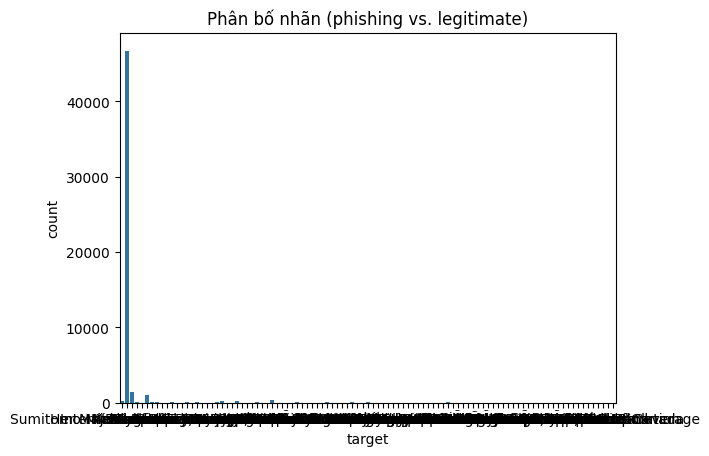

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="target", data=df)
plt.title("Phân bố nhãn (phishing vs. legitimate)")
plt.show()


In [4]:
for col in ["url", "verified", "online", "target"]:
    print(col, ":", df[col].nunique())


url : 51148
verified : 1
online : 1
target : 99


In [5]:
df["submission_time"] = pd.to_datetime(df["submission_time"], errors="coerce")
df["submission_time"].head()


0   2025-09-12 14:14:37+00:00
1   2025-09-12 14:14:05+00:00
2   2025-09-12 14:13:56+00:00
3   2025-09-12 14:01:50+00:00
4   2025-09-12 14:01:50+00:00
Name: submission_time, dtype: datetime64[ns, UTC]

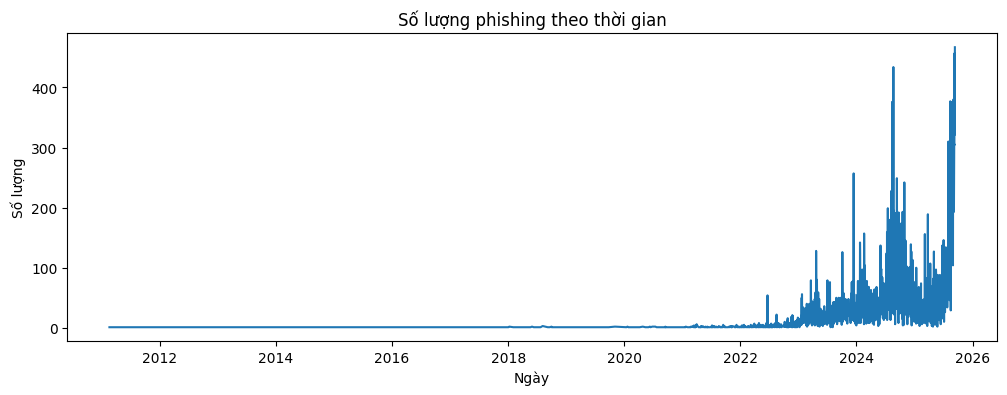

In [6]:
df["date"] = df["submission_time"].dt.date
df["date"].value_counts().sort_index().plot(figsize=(12,4))
plt.title("Số lượng phishing theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Số lượng")
plt.show()
